확률 분포 = 동전의 앞 뒤를 0.1로 정하면 0,1은 확률변수가 되고  
그 변수의 확률은 1/2씩 나온다. 그 1/2가 확률 분포에 해당한다

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

## 판다스 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프 그릴 수 있음.
- 선 그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림. # 흐름
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8) # 수치
- 히스토그램 : df.plot(kind='hist') # 빈도
- 산점도 : df.plot(x='',y='',kind='scatter') 상관관계를 볼 수 있음.
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공 # 이상치
- pichart : 분포

## matplotlib
- histogram : plt.hist(x,bins=)
- line plot : plt.plot(x,y)
- plt.bar(x,y,width=, color='')
- scatter plot : plt.scatter(x,y):

# seaborn
- sns.distplot(data, bins=,color=,kde=), histplot, displot으로 변경
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.implot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [496]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [5]:
df['NDate'] = pd.to_datetime(df['Date'])
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

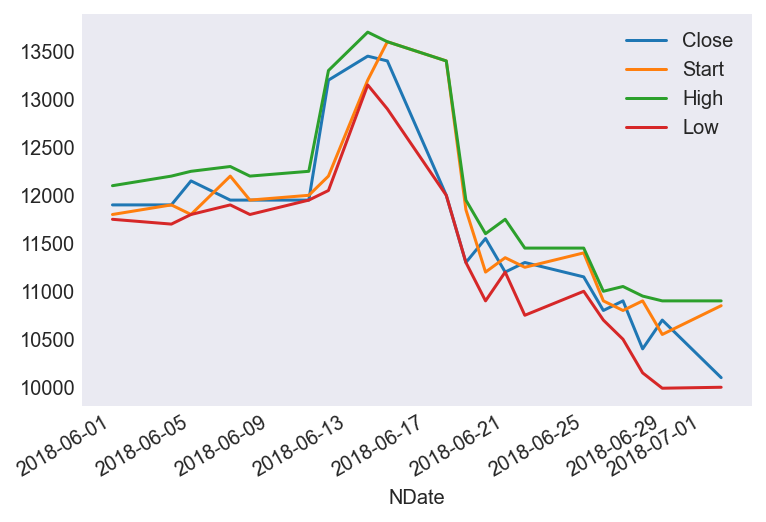

In [6]:
# 선 그래프
df1.plot()
# 우측 상단에 범례가 있음 / 날짜데이터로 변환하면 알아서 인식해서 오름차순으로 정렬

<AxesSubplot:xlabel='NDate'>

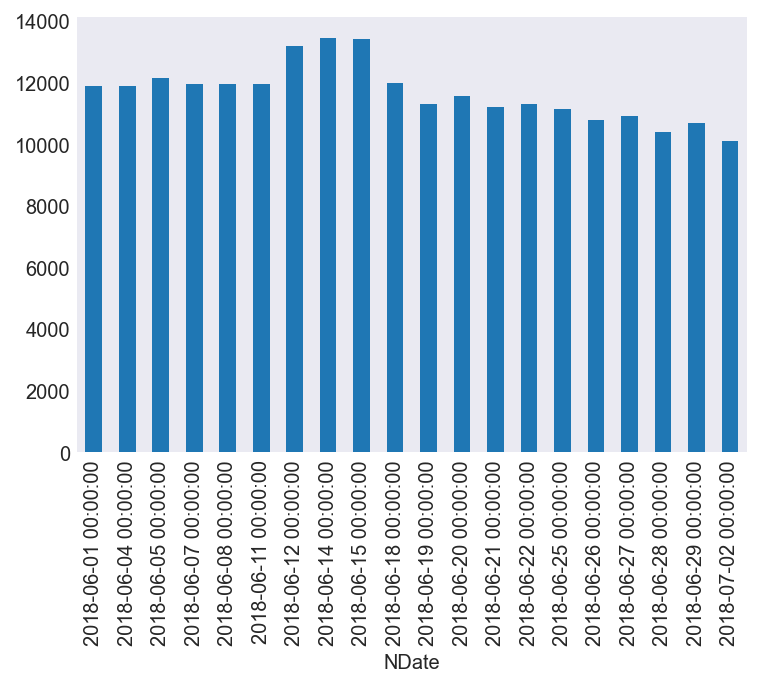

In [7]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar') # [::-1]로 역순으로 전환

<AxesSubplot:xlabel='NDate'>

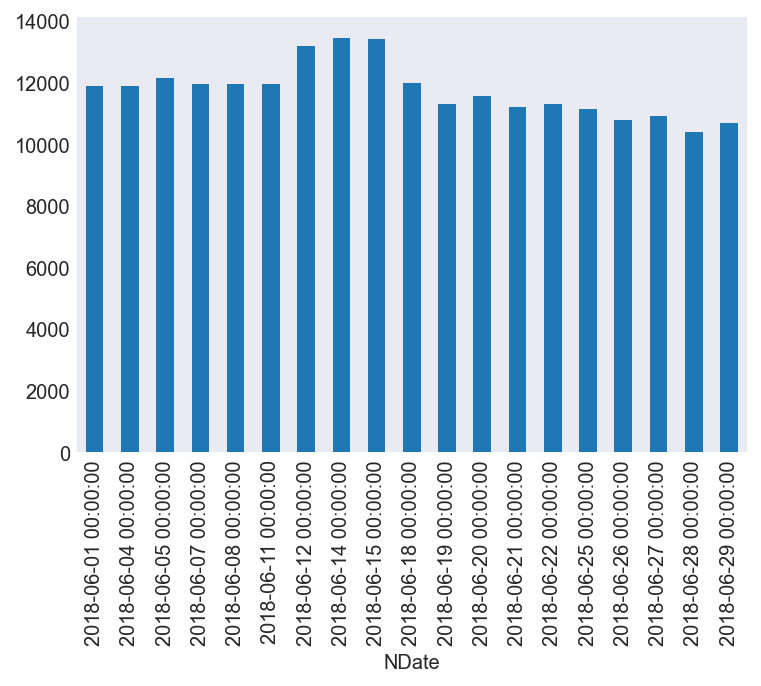

In [8]:
# 6월만 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요
# df1.Close['2018-06'][::-1].plot(kind='bar')
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

In [9]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10100    1
10700    1
10400    1
10900    1
10800    1
11150    1
11200    1
11550    1
12000    1
13400    1
13450    1
13200    1
12150    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

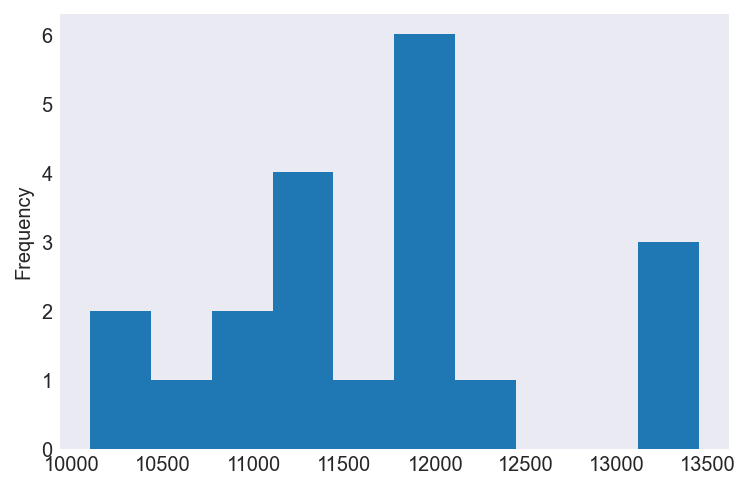

In [10]:
# Close 칼럼을 히스토그램으로 표현
df1.Close.plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Frequency'>

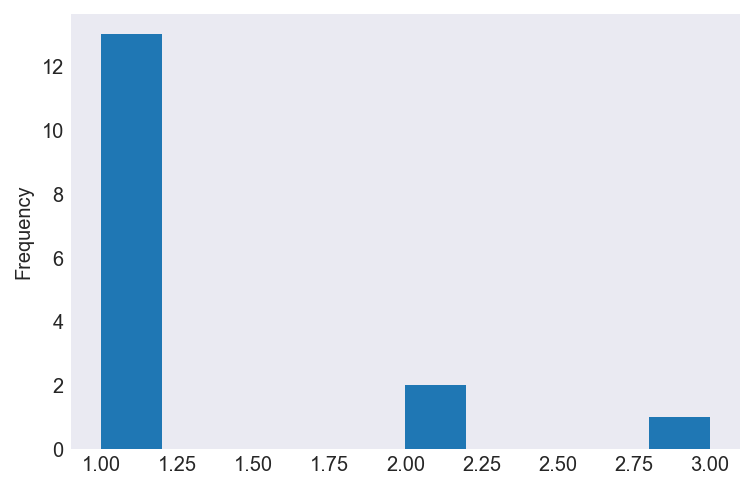

In [11]:
df1.Close.value_counts().plot(kind='hist') # Close 컬럼의 원소들을 히스토그램으로 표현

<AxesSubplot:ylabel='Frequency'>

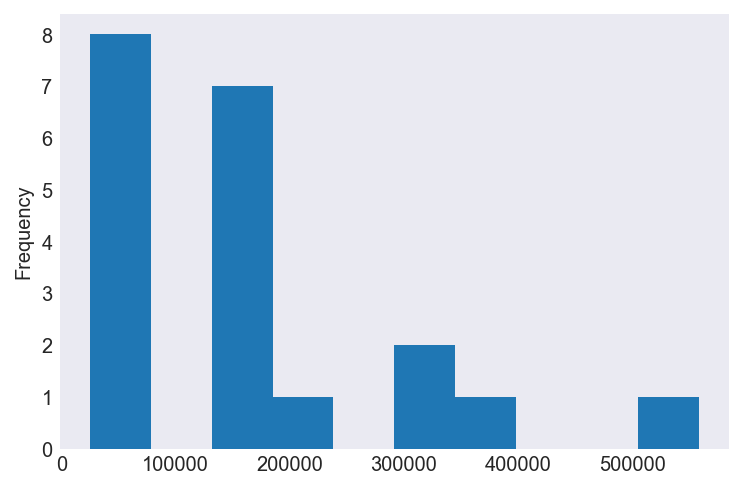

In [12]:
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

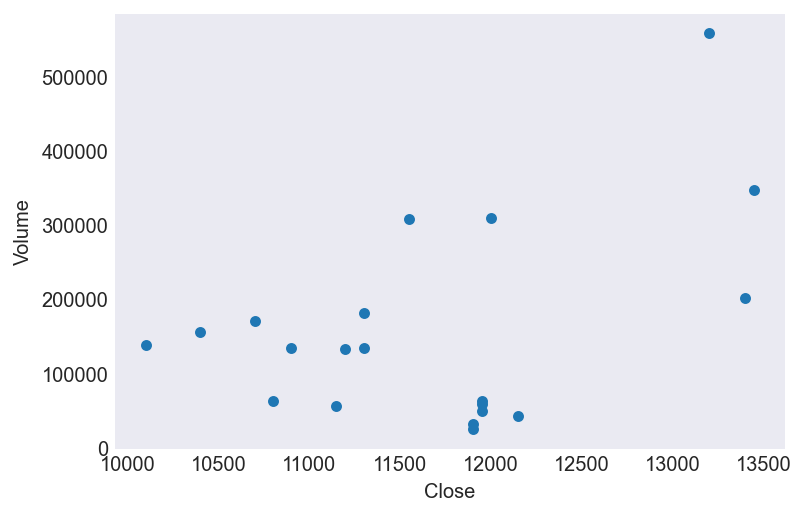

In [13]:
# Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

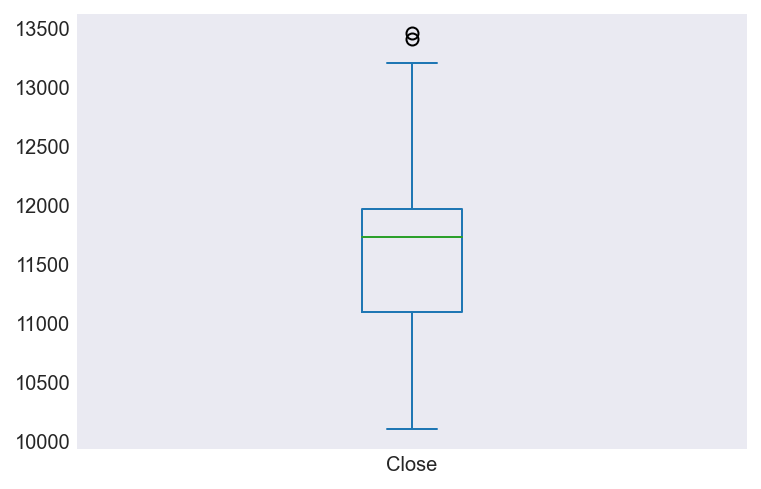

In [14]:
# Close 칼럼의 Boxplot을 표현하세요.
df.Close.plot(kind='box')
#df.boxplot(column = ['Close'])

In [15]:
df.Close.describe()
# upper = 11962.5 + iqr*1.5
# lower = 11087.5 - iqr*1.5
# iqr = 11962.5-11087.5
# iqr = Interquartile range

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

### Box plot 의미해석
- 중앙값
- IQR(Inter Quartile Range): 제 3사분위수 - 제 1사분위수
- lower whisker : Q1 - 1.5 * IQR 이내인 값중에서 최솟값
- upper whisker : Q3 + 1.5 * IQR 이내인 값중에서 최댓값
- lower whisker, upper whisker check 를 구해서 whisker들을 구한다.
- 이상치 : lower whisker, upper whisker를 벗어나는 값
- 이내는 해당 값을 포함하지 않음

In [16]:
# Close 컬럼의 이상치를 구하세요.
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
이상치 = df.Close[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
이상치

11    13400
12    13450
Name: Close, dtype: int64

In [17]:
s1 = df.Close.describe()['25%']
s3 = df.Close.describe()['75%']
IQR = s3 - s1
ds = df[(df['Close']<=(s1-IQR*1.5)) | (df['Close']>=(s3+IQR*1.5))]
ds

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [18]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


11    13600
Name: Start, dtype: int64

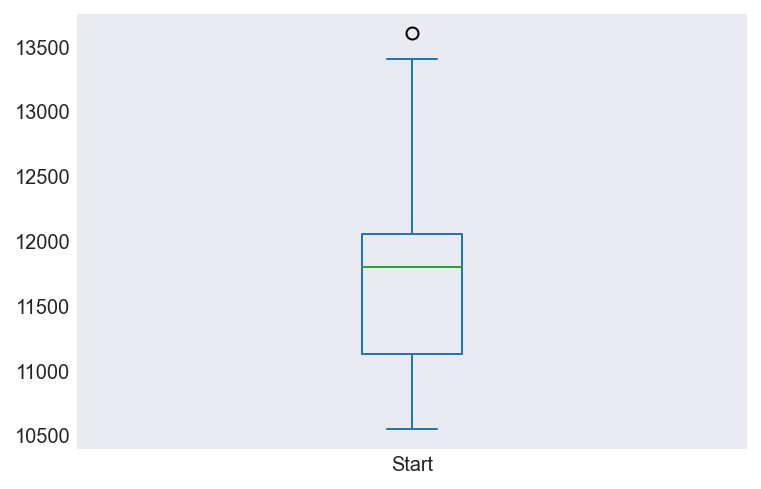

In [19]:
# 과제 
# Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')
q1 = df.Start.describe()['25%']
q3 = df.Start.describe()['75%']

iqr = q3 - q1
df.Start[(df['Start'] <= (q1 - 1.5 * iqr)) | (df['Start'] >= (q3 + 1.5 * iqr))]

In [20]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [21]:
df_ep.set_index('year',inplace=True)


<AxesSubplot:xlabel='year'>

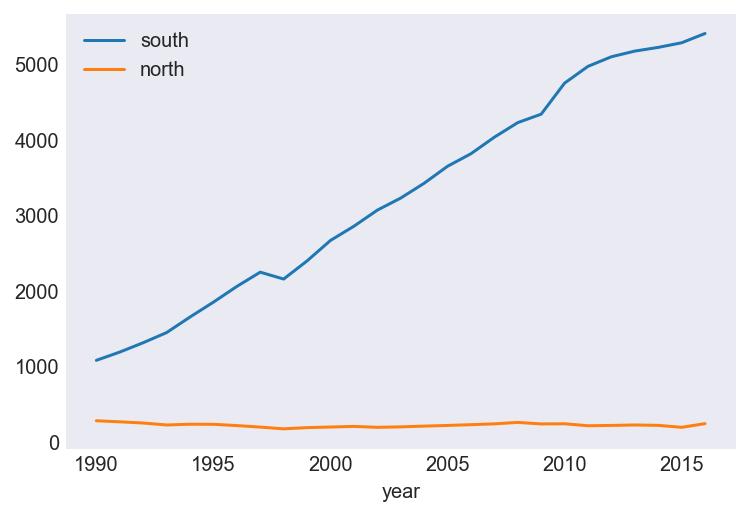

In [22]:
df_ep.plot()

<AxesSubplot:xlabel='year'>

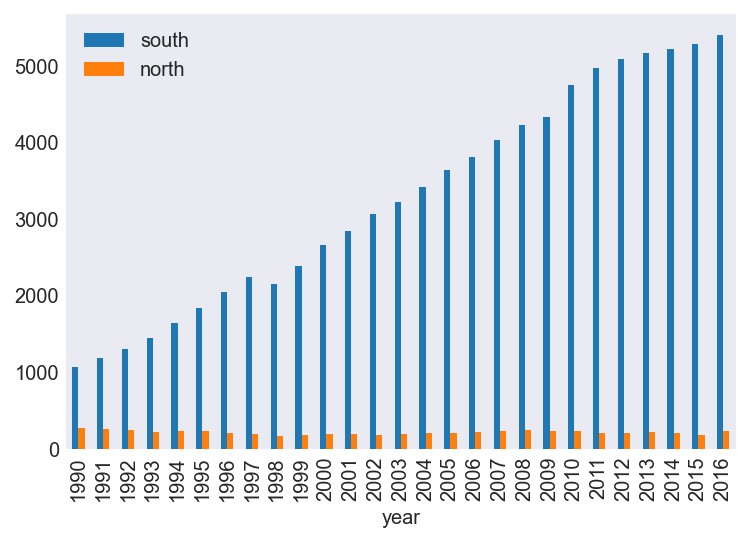

In [23]:
df_ep.plot(kind='bar')

<AxesSubplot:>

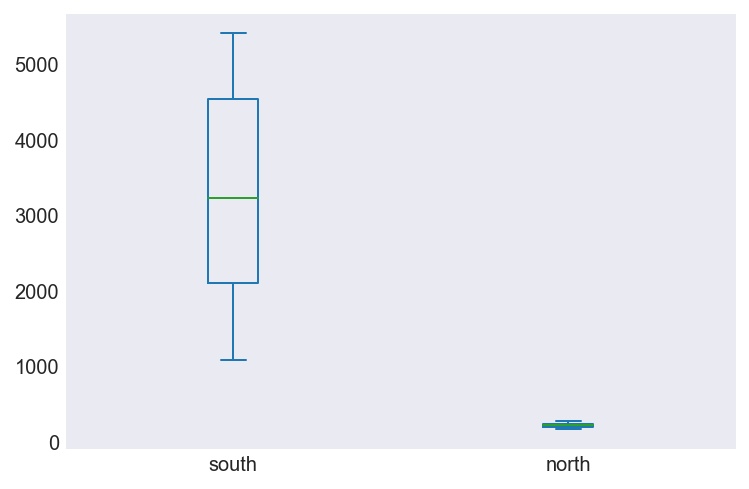

In [24]:
df_ep.plot(kind='box')

<AxesSubplot:xlabel='year'>

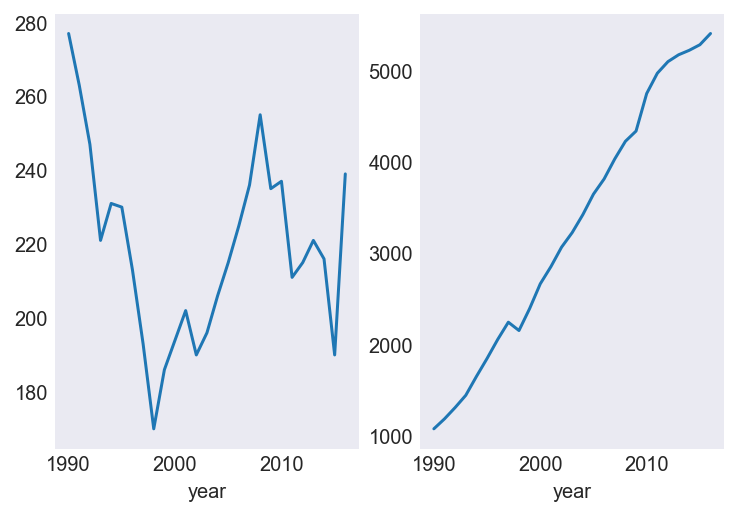

In [50]:
plt.subplot(1,2,1)
df_ep['north'].plot()
plt.subplot(1,2,2)
df_ep['south'].plot()

In [25]:
# 과제
# 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.
# 북한은 발전량 범위가 280이내에서 이루어진다
# 남한은 특정 이벤트가 있었던 시기에 발전량이 크게 증감했다(1998 : IMF / 2009 : 신종플루)
# 위기로 인해 발전량이 내려가면 극복하면서 크게 반등한다
# 남,북한의 발전량의 차이는 점점 갈수록 크게 벌어진다
# 남한의 lower whisker가 북한의 upper whisker랑 한참 차이난다


In [26]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [83]:
df_auto.horsepower.replace('?',np.nan,inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(),inplace=True)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [27]:
# 과제
# df_auto의 각 컬럼을 시각화 해서 탐색한 후 인사이트를 기술하세요 (5개 이상)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

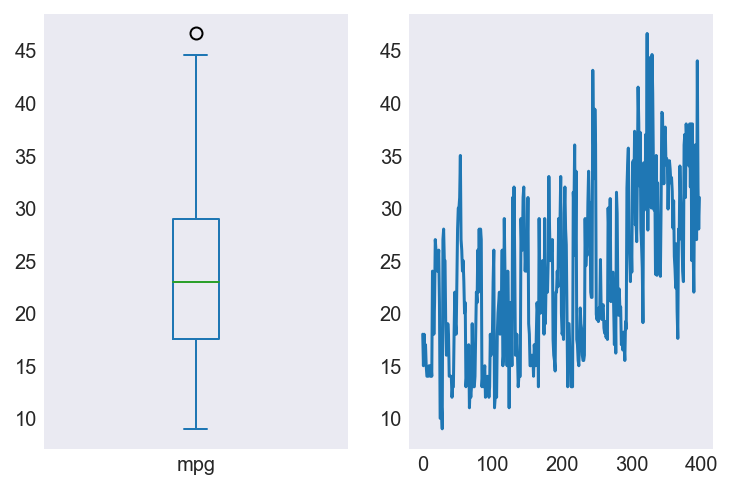

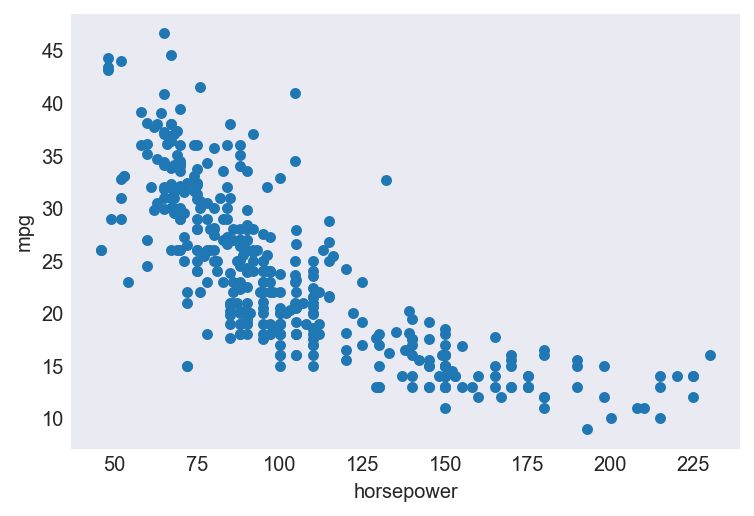

In [85]:
# mpg 컬럼의 평균은 하향 평준화 되어있다
plt.subplot(1,2,1)
df_auto['mpg'].plot(kind='box')
plt.subplot(1,2,2)
df_auto['mpg'].plot()

df_auto.plot(x='horsepower',y='mpg',kind='scatter')
# 마력이 좋을 수록 연비가 떨어진다

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

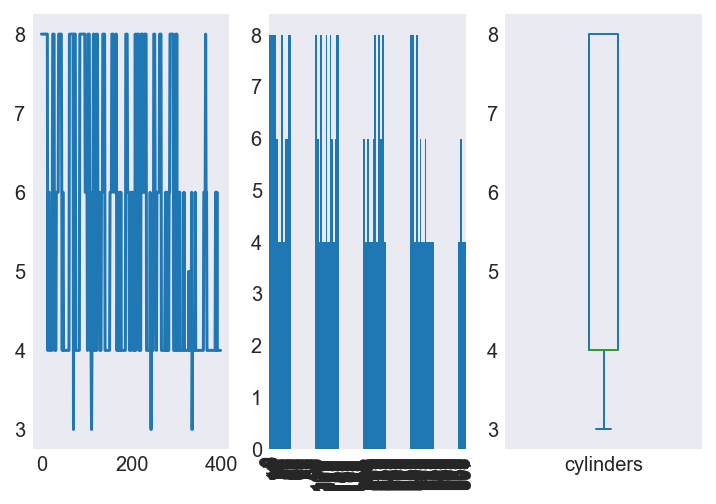

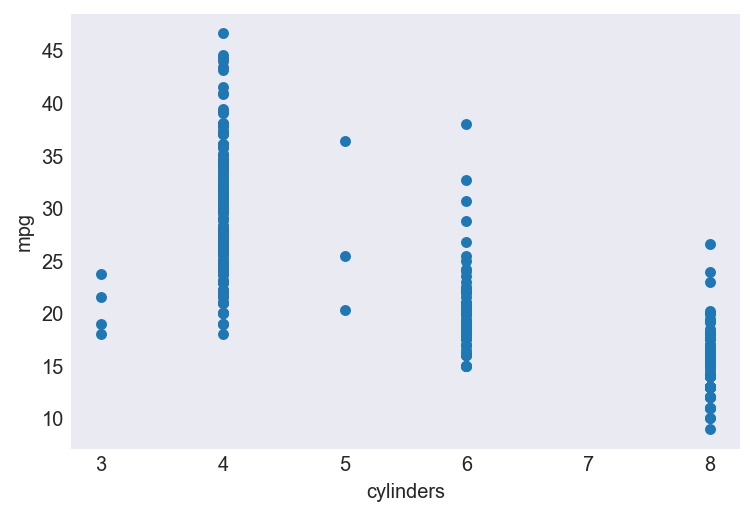

In [89]:
df_auto.cylinders.plot(kind='bar')
# 실린더의 갯 수는 대부분 짝수로 떨어진다.
plt.subplot(1,3,1)
df_auto['cylinders'].plot()
plt.subplot(1,3,2)
df_auto['cylinders'].plot(kind='bar')
plt.subplot(1,3,3)
df_auto['cylinders'].plot(kind='box')

df_auto.plot(x='cylinders',y='mpg',kind='scatter')

<AxesSubplot:>

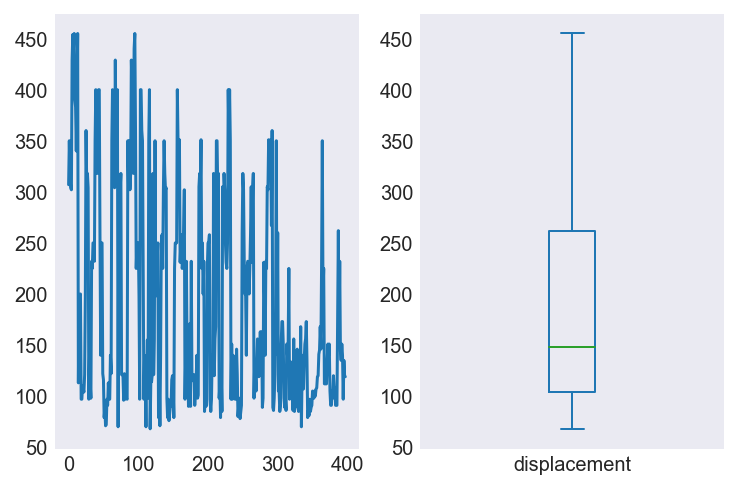

In [77]:
plt.subplot(1,2,1)
df_auto.displacement.plot()
plt.subplot(1,2,2)
df_auto.displacement.plot(kind='box')

In [43]:
# mpg 컬럼의 이상치를 구하세요.
a1 = df_auto.mpg.describe()['25%']
a3 = df_auto.mpg.describe()['75%']
iqr = a3 - a1

df_auto.mpg[((df_auto['mpg']<=(a1 - 1.5 * iqr)) | (df_auto['mpg']>=(a3 + 1.5 * iqr)))]

322    46.6
Name: mpg, dtype: float64

In [74]:
# 이상치 구하는 사용자 함수
def adv(value):
    q1 = value.describe()['25%']
    q3 = value.describe()['75%']
    iqr = q3 - q1

    result = value[((value<=(q1 - 1.5 * iqr)) | (value>=(q3 + 1.5 * iqr)))]
    return result

j = adv(df_auto['mpg'])
j

322    46.6
Name: mpg, dtype: float64

# 과제
# 통계학의 기초 개념을 설명하세요.
### 1. 모수의 개념 및 예
    모집단 : 데이터가 랜덤하게 표본화 되었다고 가정하는 분포/집단
    ex) 무한히 많은 수면 환자들
    모수 : 모집단을 정의하는 값을 모르는 상수
    ex) 무한히 많은 수면환자들의 평균 수면시간 증가
    표본 : 모집단으로부터 랜덤하게 추출된 일부 관측치
    ex) 10명의 랜덤하게 무작위로 추출한 사람들
### 2. 통계량의 개념 및 예
    통계량 : 모수를 추정하기 위해 데이터로부터 계산된 값
    ex) 표본의 평균 수면시간 증가
### 3. 확률변수, 확률, 확률분포
    확률변수 : 특정 확률로 발생하는 사건의 결과에 대래 실수값의 변수를 부여함 / 동전 앞면(0) , 동전 뒷면(1)
    확률 : 특정한 사건이 일어날 가능성의 정도(해당사건이 일어나는 경우의 수 / 전체 사건의 경우의 수)
    확률분포 : 확률변수와 그에 대응하는 확률의 분포
    ex)주사위던지기(주사위의 눈이 : 1,1,2,3,4,5)
    확률변수 : 1 ~ 5
    확률(주사위 눈 1 =) : 1/3
    확률분포 : {1: 1/3, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6}
### 4. 도수, 도수분표, 상대도수
    도수 : 각 계급에 속하는 변량의 갯 수
    도수분포 : 측정 값을 몇 개의 계급으로 나누고, 각 계급에 속하는 수의 도수(=빈도)를 나타낸 분포
    상대도수 : 전체 도수에 대한 각 계급의 도수의 비율
### 5. 평균값, 기대값, 분산, 표준편차
    평균값 : 모든 자료값을 더한 후 그 값을 자료값의 갯 수로 나눈것
    기대값 : 확률적 사건에 대한 평균값, 전체 사건에 대하여,[각 사건이 발생했을 때의 값 * 해당 사건이 일어나는 확률]의 합
    분산 : 확률변수가 기대값으로부터 떨어진 정도를 나타냄(혹은 관측값이 평균으로부터 떨어진 정도), 편차의 제곱의 합 개념(편차의 합은 0이기에 제곱함)
    표준편차 : sqrt(분산). 분산은 편차 제곱의 합이므로 sqrt로 값을 조정함
### 6. 확률질량함수, 확률밀도함수
    확률질량함수 : 이산확률변수의 확률분포
    ex) 동전 던지기
    확률밀도함수 : 연속확률변수의 확률분포
    ex) 정규분포
### 7. 정규분포, 이항분포, 포아송분포
    정규분포
        - 평균을 중심으로 모여있는 좌우대치인 종모양인 연속활률분포, 많은 데이터들이 정규분포를 따름
        - 평균 Mu, 표준편차 sigma인 연속확률분포(=가우스분포)
    
    이항분포
        - 연속된 n번의 독립적 시행에서 각 시행이 확률 p를 가지는 이산확률분포, 시행 횟수가 많아질수록 이항분포가하는 정규분포에 가까워진다
        - ex) 주사위를 n번 던져서 주사위의 눈이 1이 나오는 경우의 확률분포
### 8. 표본분산(n), 불편분산(n-1)
    표본분산 : 편차 제곱의 합을 n으로 나눔
    불편분산 : 편차 제곱의 합을 n-1로 나눔. 표본분산에서 나타나는 오차를 보정함, 모분산을 추정하는데 더 유리함
    불편추정량

### 9. 기술통계, 추측통계
    기술통계 : 수집한 표본의 통계량을 기술, 설명하는 통계 기법
    ex) df.describe(), 도수분포표
    추측통계 : 표본에서 추출한 표본 통계량을 기반으로 모집단의 모수를 예측하는 통계기법
    ex) 서울우유 200ml는 정말 200ml인가?
### 10. 가설과 검정
    가설 : 모집단의 특성인 모수에 대해 주장하는 명제, 귀무가설, 대립가설로 나뉨
    ex) 귀무가설 : 한국인의 평균나이는 40세 이다. / 대립가설 : 한국인의 평균나이는 40세가 아니다.
    검정 : 가설의 참, 거짓 여부를 모집단에서 추출한 표본을 통해 통계적으로 판별함.


In [92]:
import pandas as pd
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

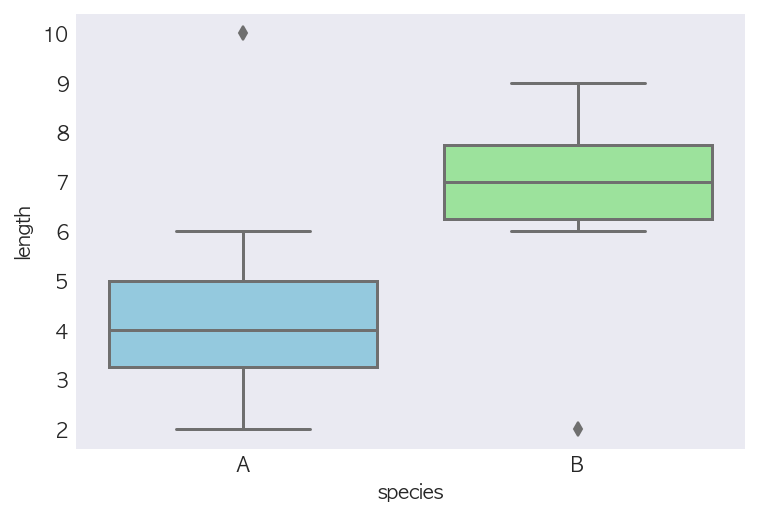

In [330]:
# fish_multi.groupby('species').plot(kind='box')
import seaborn as sns
# sns.boxplot(x='species',y='length',data=fish_multi,color='lightgreen')
sns.boxplot(x='species',y='length',data=fish_multi,palette=('skyblue','lightgreen'))

In [107]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [355]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi.groupby('species').describe())

        length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0


<AxesSubplot:xlabel='species', ylabel='length'>

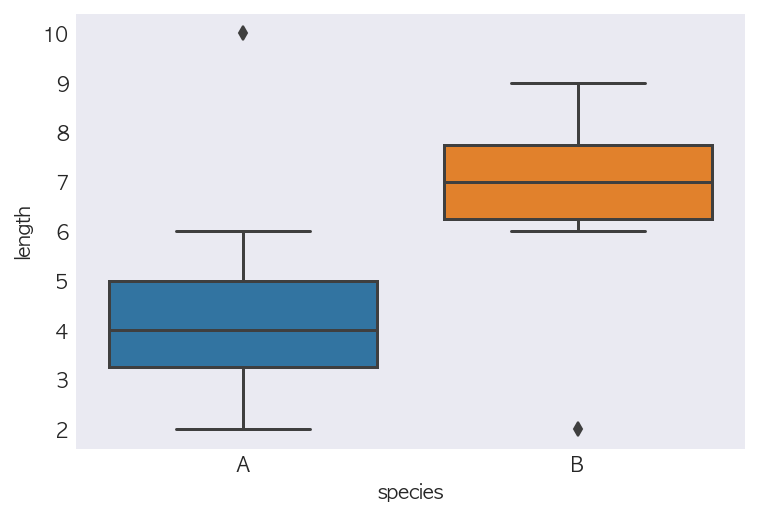

In [337]:
# 과제
# A, b 그룹의 Box Plot을 그리고 이상치를 구하세요
sns.boxplot(x='species',y='length',data=fish_multi)

In [399]:
def wow(a):
    q1, q3 = np.percentile(a,[25,75])
    iqr = q3 - q1
    return a[((a <= (q1 - 1.5 * iqr)) | (a >= (q3 + 1.5 * iqr)))]

a = wow(fish_multi.groupby(['species']).get_group('A')['length'])
b = wow(fish_multi.groupby(['species']).get_group('B')['length'])
print(a)
print(b)

5    10
Name: length, dtype: int64
10    2
Name: length, dtype: int64


In [157]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
import numpy as np
data = np.random.rand(10000) * 1000
df = pd.DataFrame(data,columns=['Num'])
df.describe()

,Num
count,10000.000000
mean,499.729689
std,288.003497
min,0.146392
25%,250.247376
50%,501.011635
75%,747.536488
max,999.906232


<AxesSubplot:ylabel='Frequency'>

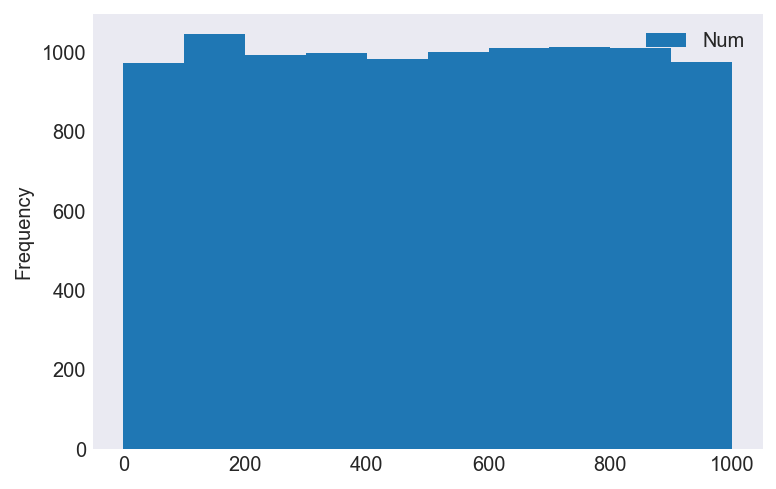

In [159]:
df.plot(kind='hist')

In [170]:
# 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임 생성
# 통계 시각표 및 시각화를 수행하세요(컬럼명 'Num)
import numpy as np

data = np.random.randn(10000) * 1000
df = pd.DataFrame(data,columns=['Num'])
df.describe()

,Num
count,10000.000000
mean,19.856272
std,994.411006
min,-4639.836068
25%,-641.519537
50%,25.611323
75%,689.446174
max,3984.321099


<AxesSubplot:ylabel='Frequency'>

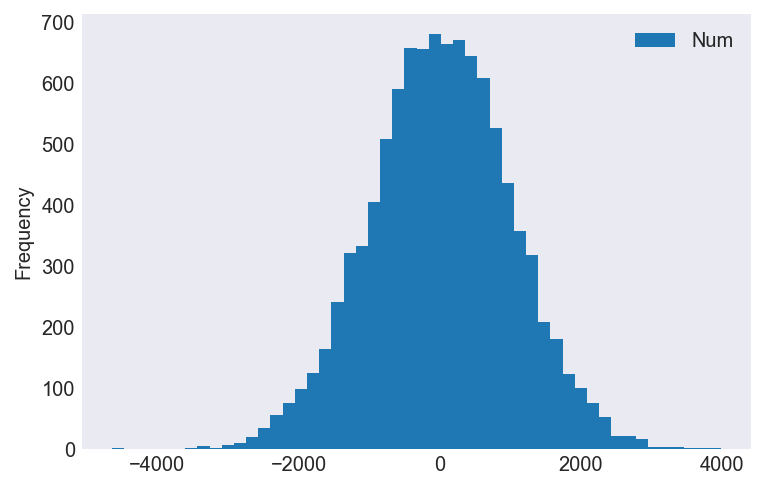

In [171]:
df.plot(kind='hist',bins=50)

         Num
0  13.528105
1  10.800314
2  11.957476
3  14.481786
4  13.735116
                Num
count  10000.000000
mean       9.963133
std        1.975212
min        2.519799
25%        8.620586
50%        9.945855
75%       11.292178
max       17.603320


<AxesSubplot:ylabel='Frequency'>

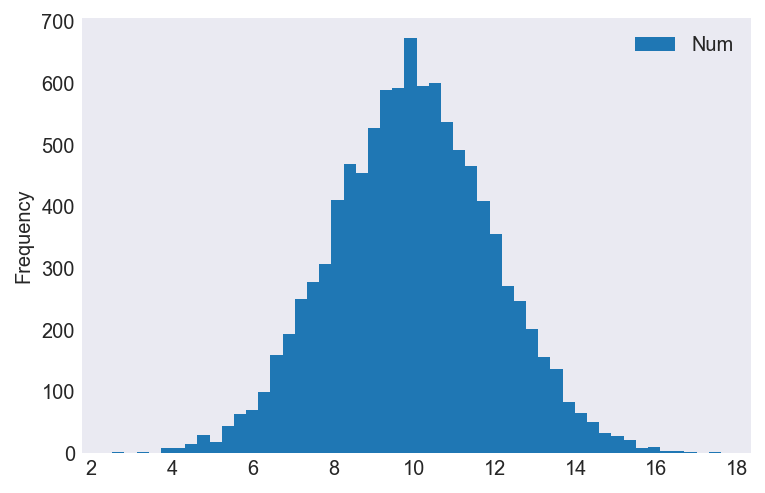

In [174]:
from scipy import stats
np.random.seed(0)
sample1 = stats.norm.rvs(loc=10,scale=2,size=10000) # 평균 10, 표준편차 2, 샘플 10000
df1 = pd.DataFrame(sample1,columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist',bins=50)

<AxesSubplot:>

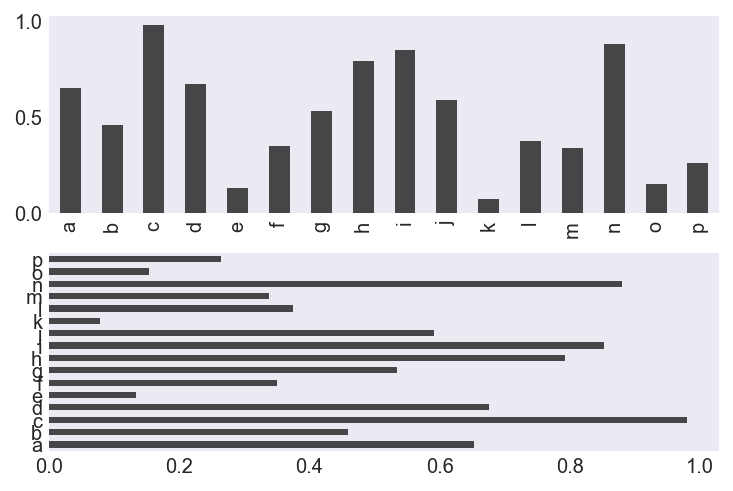

In [182]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7) # alpha = 투명도
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

In [184]:
df = pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns=['A','B','C','D'])
df

,A,B,C,D
one,0.047284,0.465898,0.161442,0.976525
two,0.431433,0.905909,0.202604,0.571585
three,0.741089,0.794794,0.665525,0.999020
four,0.716292,0.611761,0.874793,0.718218
five,0.130311,0.769010,0.150670,0.148674
six,0.290460,0.746578,0.584312,0.346050


<AxesSubplot:>

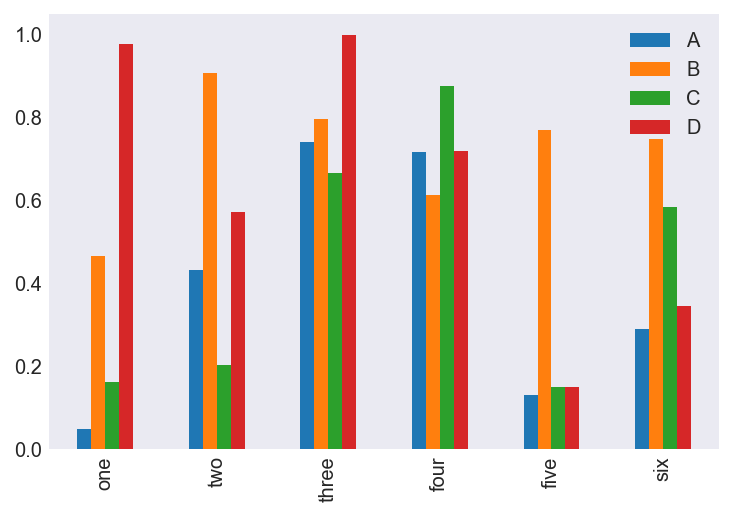

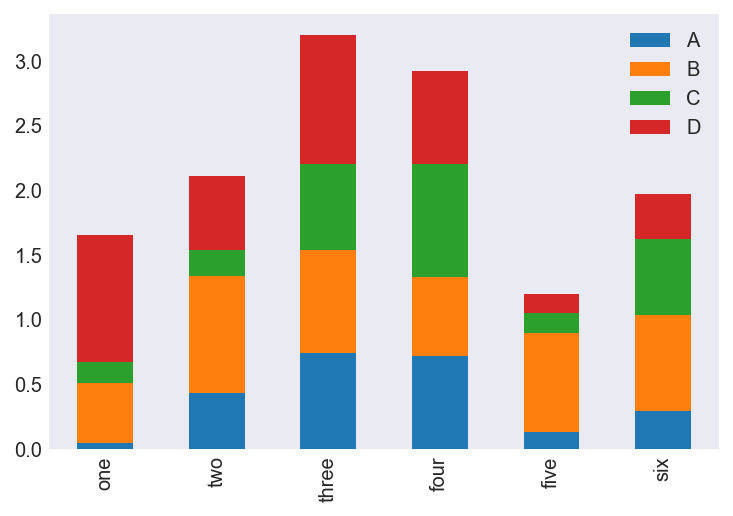

In [186]:
df.plot(kind='bar')
df.plot(kind='bar',stacked=True)

<AxesSubplot:>

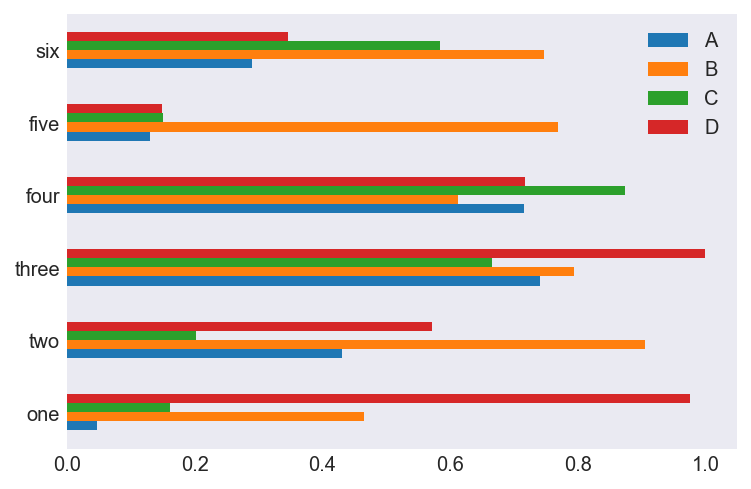

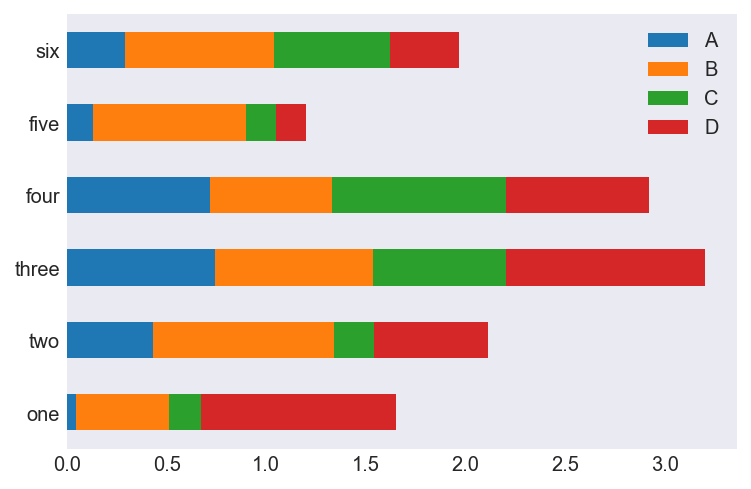

In [188]:
df.plot(kind='barh')
df.plot(kind='barh',stacked=True)

<AxesSubplot:>

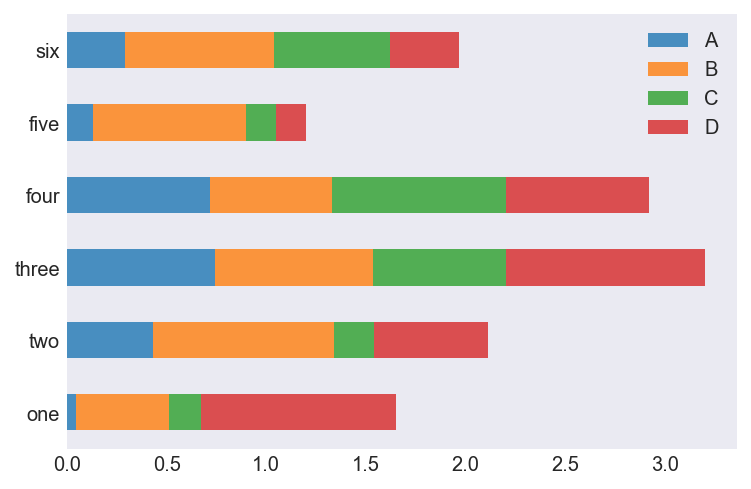

In [189]:
df.plot(kind='barh',stacked=True,alpha=0.8)

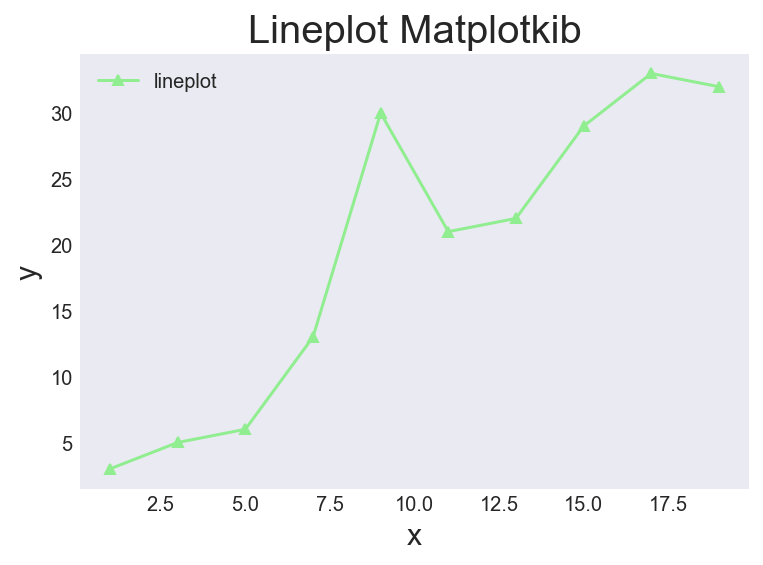

In [195]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(6,4))
plt.plot(x,y,color='lightgreen',marker='^',markersize=5)
plt.title('Lineplot Matplotkib',size=20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

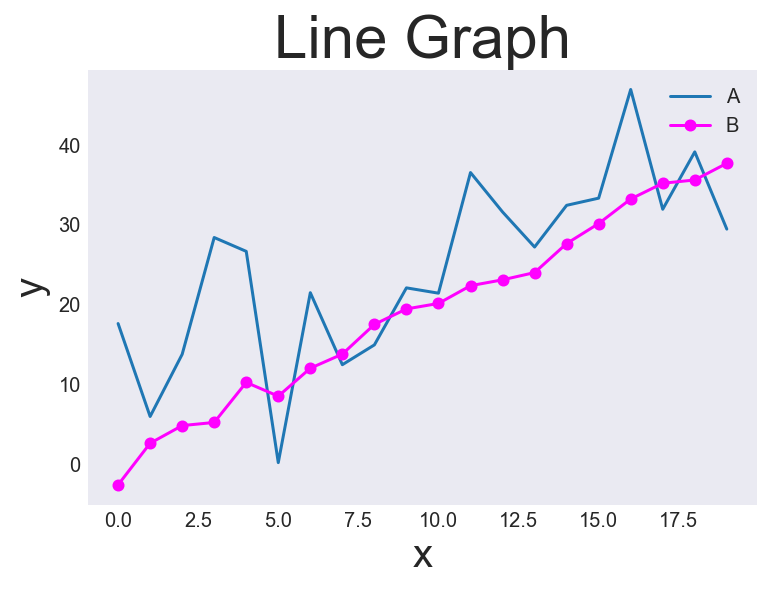

In [199]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20) * 2 + np.random.randn(20)*10
y2 = np.arange(20) * 2 + np.random.randn(20)
plt.figure(figsize=(6,4))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o',markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(['A','B'])


range(0, 10)
[4 7 3 3 6 8 5 3 2 9]


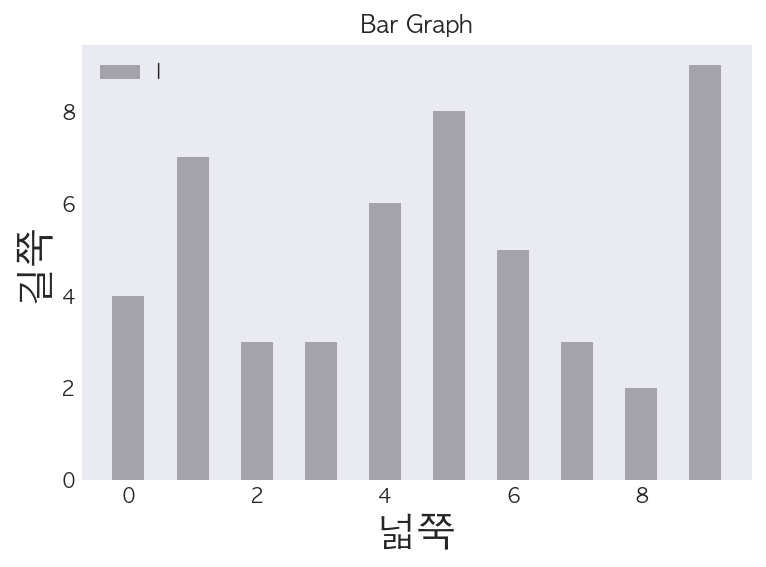

In [486]:
# 과제 추가 decoration
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(6,4))
plt.bar(x,y,width=0.5,color='k',alpha=0.3)
# color = sns,color_palette('pastel')
plt.ylabel('길쭉',size=20)
plt.xlabel('넓쭉',size=20)
plt.title('Bar Graph')
plt.legend('legend')

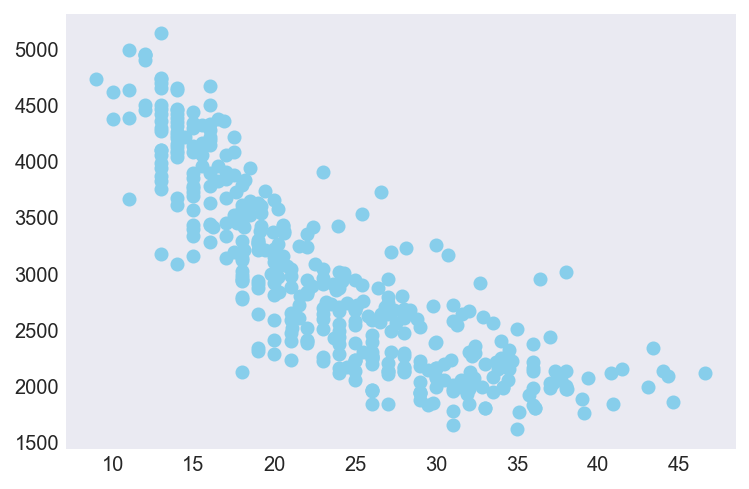

In [213]:
# 산점도
# scatter plot
df_auto = pd.read_csv('dataset/auto-mpg.csv')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='skyblue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

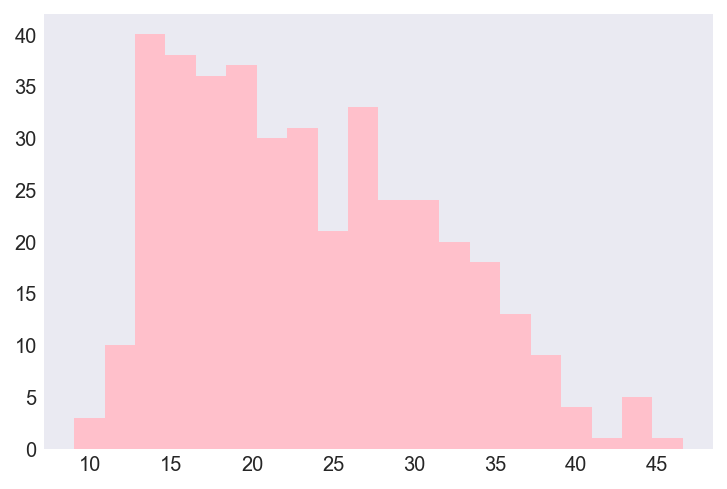

In [237]:
# histogram
plt.hist(df_auto.mpg,bins=20,color='pink')

{'whiskers': [<matplotlib.lines.Line2D at 0x2b9fd47f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9fd4f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9fd4460>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9fe1670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9fe1a00>],
 'means': []}

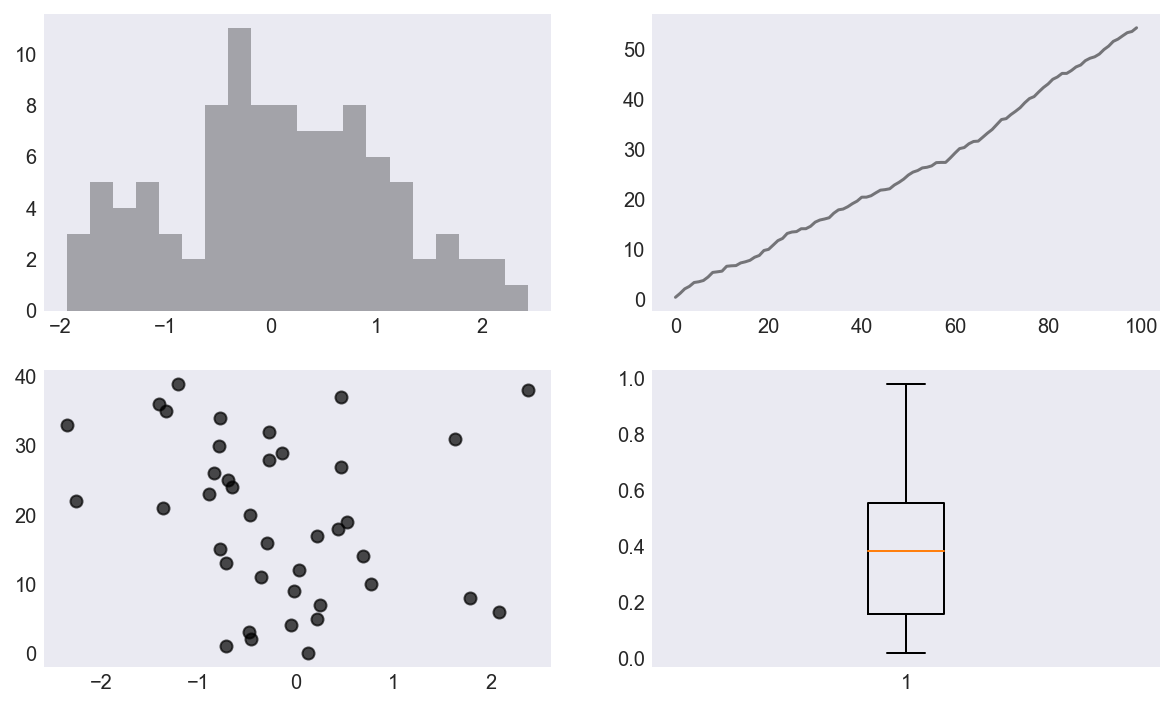

In [261]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# ax2.plot(np.random.randn(50).cumsum(),'k--') 누적 선 그래프
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.plot(np.random.rand(100).cumsum(),color='k',alpha=0.5)
ax3.scatter(np.random.randn(40),range(len(np.random.randn(40))),color='k',alpha=0.7)
ax4.boxplot(np.random.rand(40))

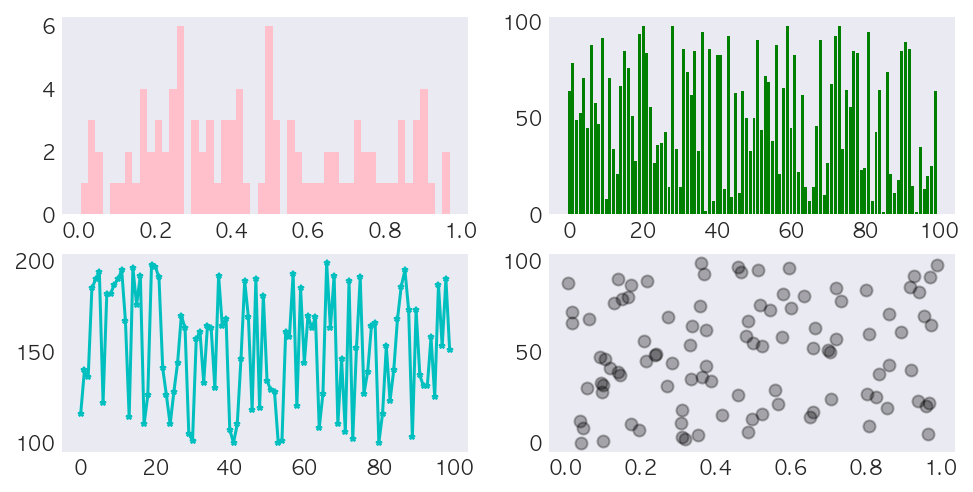

In [495]:
# 과제 3
# 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.rand(100),bins=50,color='pink')

y = np.random.randint(1,100,size=100)
x = range(len(y))
ax2.bar(x,y,color='g')

ax3.plot(np.random.randint(100,200,size=100),marker='*',markersize=3,color='c')
ax4.scatter(np.random.rand(1,100),range(len(np.random.rand(100))),marker='o',color='k',alpha=0.3)


(array([1.00000e+00, 0.00000e+00, 4.00000e+00, 9.00000e+00, 2.50000e+01,
        5.80000e+01, 1.84000e+02, 3.99000e+02, 8.43000e+02, 1.84200e+03,
        3.84500e+03, 7.48300e+03, 1.40100e+04, 2.52810e+04, 4.33270e+04,
        7.07640e+04, 1.10892e+05, 1.66992e+05, 2.38426e+05, 3.26445e+05,
        4.27062e+05, 5.34293e+05, 6.41643e+05, 7.33062e+05, 8.03047e+05,
        8.39421e+05, 8.41171e+05, 8.04490e+05, 7.35772e+05, 6.43331e+05,
        5.38021e+05, 4.28771e+05, 3.28972e+05, 2.40681e+05, 1.68169e+05,
        1.11533e+05, 7.16690e+04, 4.36990e+04, 2.51880e+04, 1.42550e+04,
        7.72000e+03, 3.82200e+03, 1.89700e+03, 8.46000e+02, 3.72000e+02,
        1.51000e+02, 6.30000e+01, 3.30000e+01, 1.20000e+01, 4.00000e+00]),
 array([-5.51905874e+00, -5.30686647e+00, -5.09467421e+00, -4.88248194e+00,
        -4.67028967e+00, -4.45809740e+00, -4.24590514e+00, -4.03371287e+00,
        -3.82152060e+00, -3.60932833e+00, -3.39713607e+00, -3.18494380e+00,
        -2.97275153e+00, -2.76055926e+00

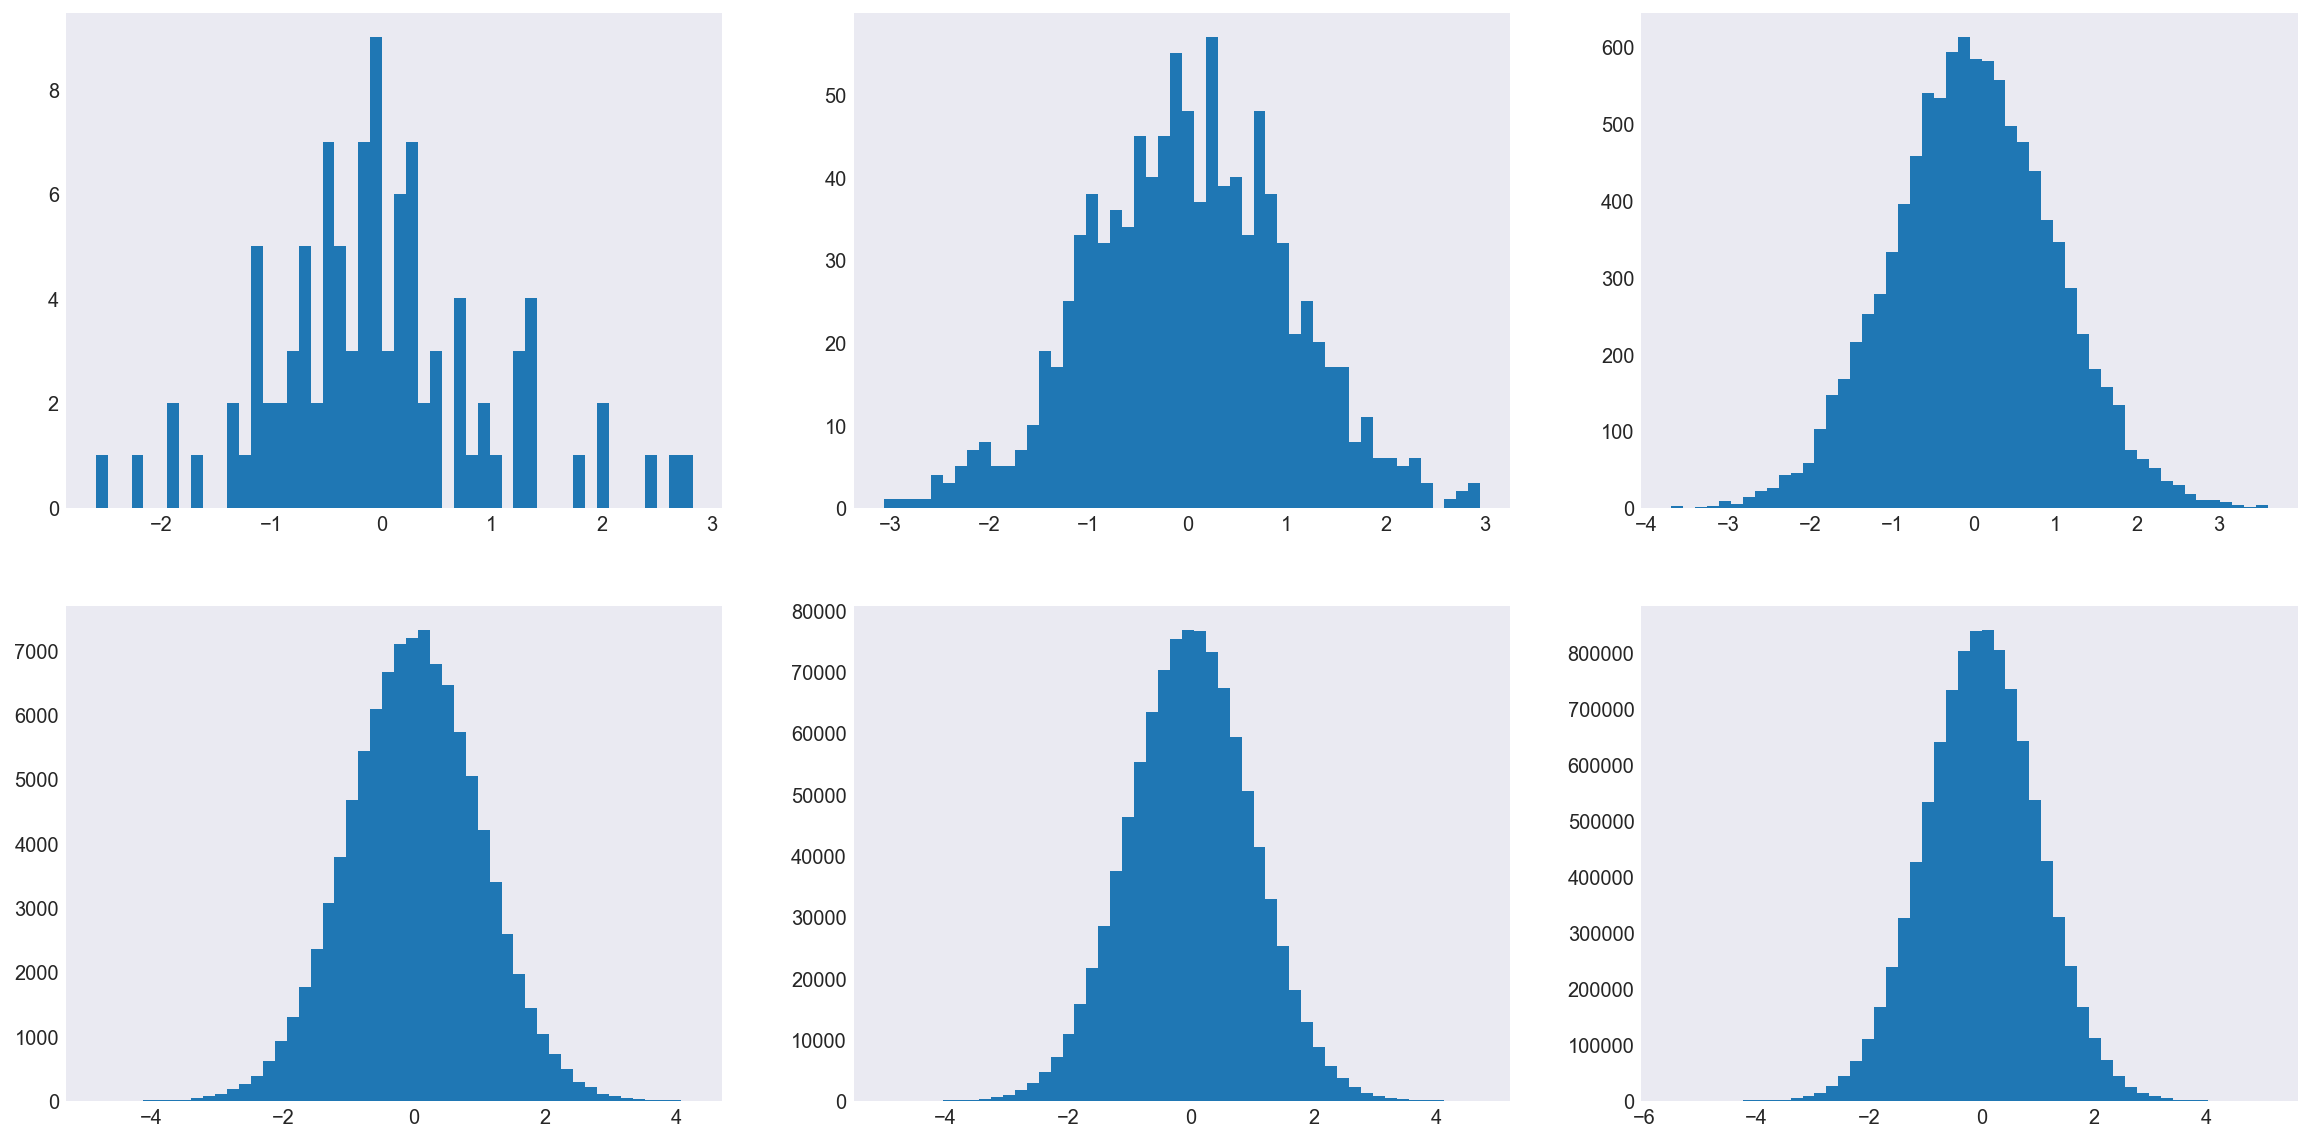

In [265]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

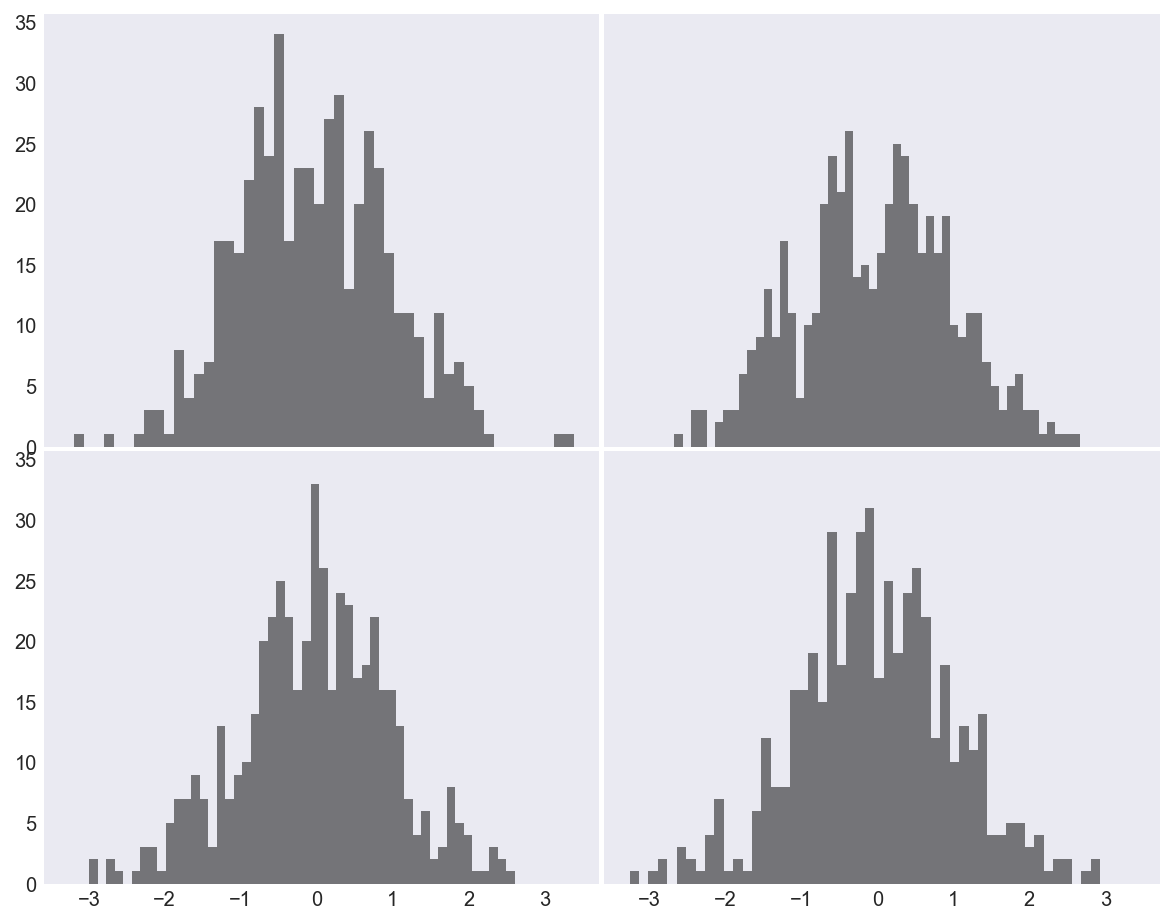

In [266]:
fig,axes = plt.subplots(2,2,figsize=(10,8),sharex=True,sharey=True) # x,y 축 공유
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01,hspace=0.01)

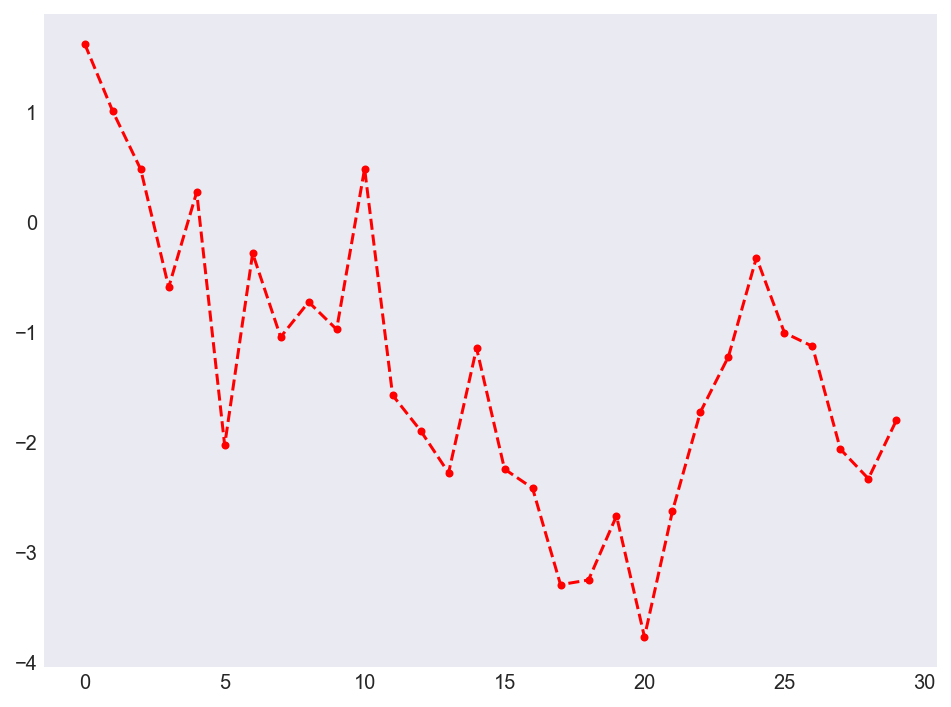

In [286]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(8,6))
plt.plot(randn(30).cumsum(),linestyle='dashed',color='red',marker='o',markersize=3)

In [287]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [308]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

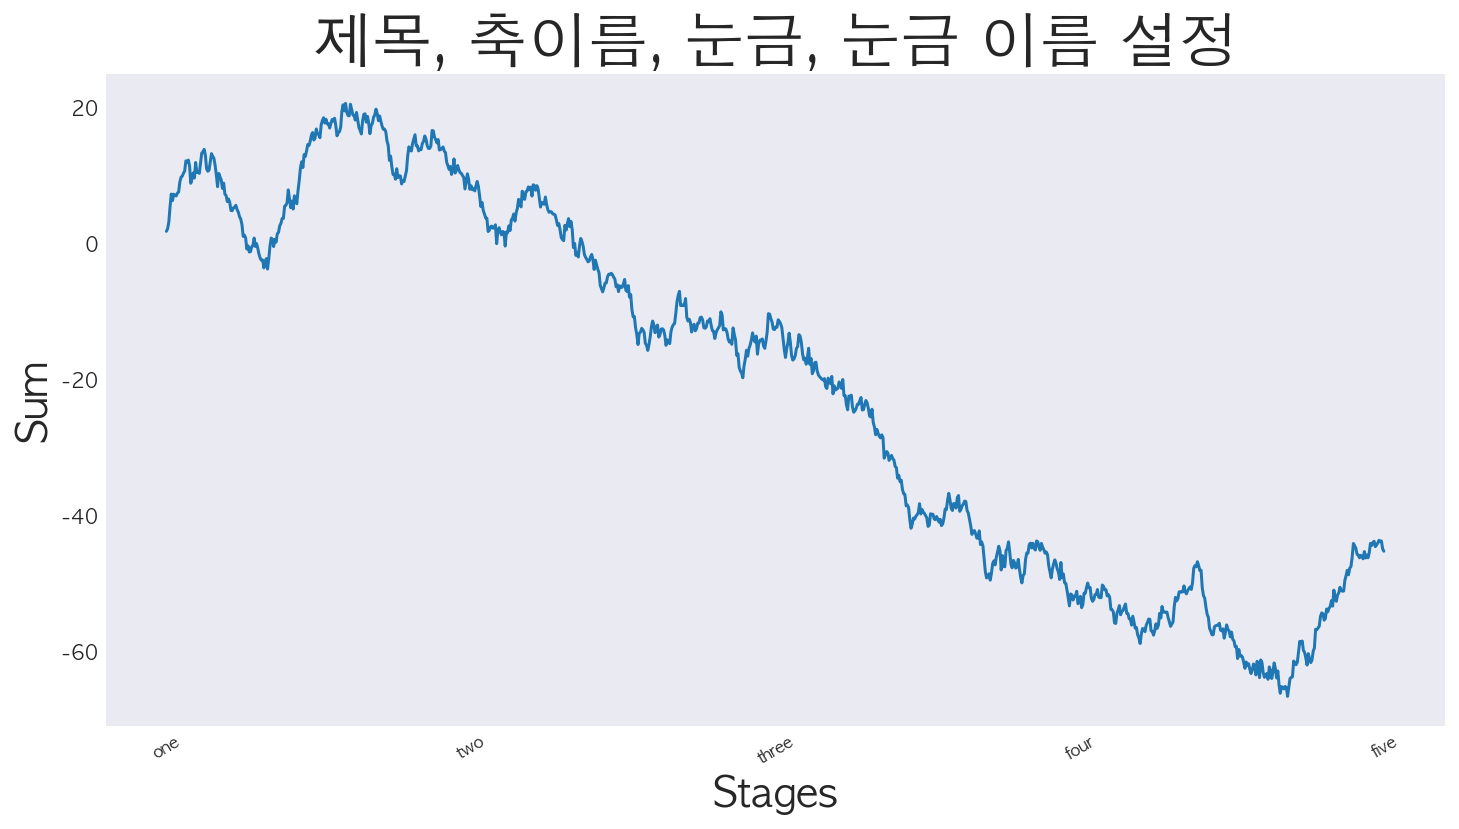

In [309]:
import warnings
from matplotlib import rc

warnings.filterwarnings('ignore')
rc('font',family='AppleGothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)


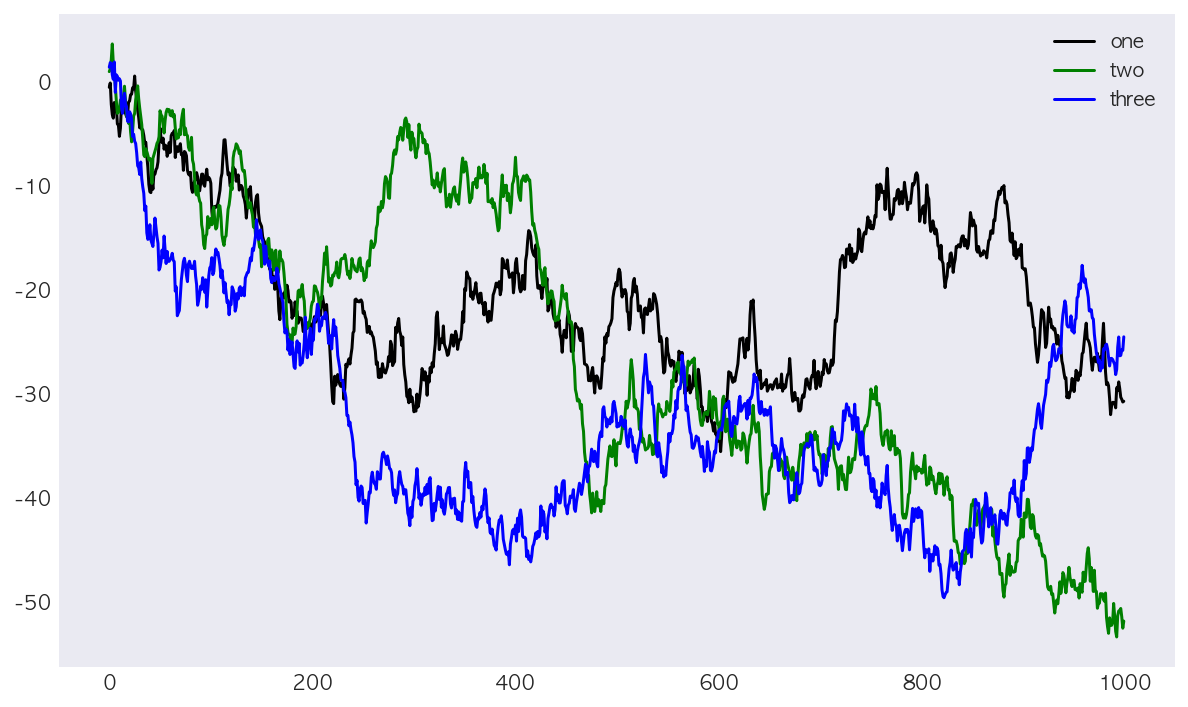

In [312]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'g',label='two')
ax.plot(randn(1000).cumsum(),'b',label='three')
plt.legend(loc='best')

In [443]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [444]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat

df['age_cat'] = df['age'].apply(get_age_cat)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


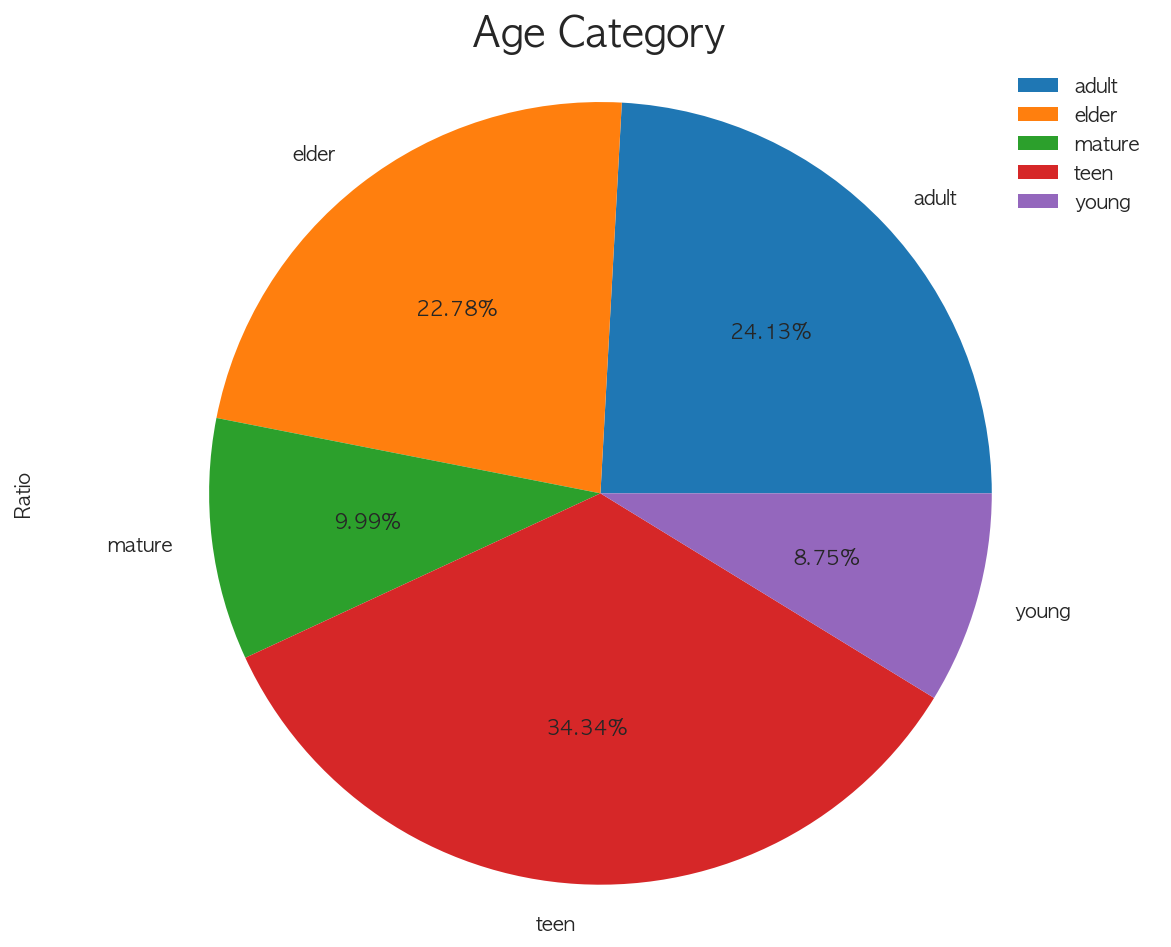

In [445]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',figsize=(10,8),autopct='%.2f%%',startangle=0)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

In [437]:
# 과제
# 시각화 탐색을 통하여 df의 각 컬럼에 대한 인사이트를 기술하세요(5개 이상)
# - 의미없는 변수 제거
# - 변수 분포
# - 종복변수인 survived와 독립변수간 상관관계
# - 독립변수간 상관관계
# - 분석에 의미있는 파생변수 도출

In [446]:
df.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_cat,Ratio
0,0,3,male,22.0,1,0,7.2500,S,teen,1
1,1,1,female,38.0,1,0,71.2833,C,adult,1
2,1,3,female,26.0,0,0,7.9250,S,teen,1
3,1,1,female,35.0,1,0,53.1000,S,adult,1
4,0,3,male,35.0,0,0,8.0500,S,adult,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,teen,1
887,1,1,female,19.0,0,0,30.0000,S,teen,1
888,0,3,female,NaN,1,2,23.4500,S,elder,1
889,1,1,male,26.0,0,0,30.0000,C,teen,1


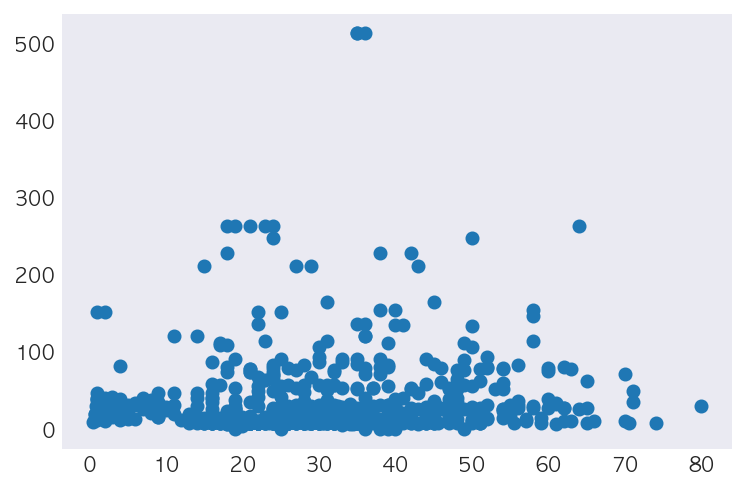

In [459]:
plt.scatter(df.age,df.fare) # 나이에 상관없이 대부분 일정한 금액을 지불했다

(array([14., 10.,  0.,  6., 10.,  4.,  0.,  3.,  3.,  4.,  8.,  0.,  2.,
         4.,  1.,  2.,  0.,  7.,  5., 17., 13.,  0., 26., 25., 15., 25.,
         0., 27., 15., 31., 24.,  0., 18., 18., 25., 22.,  0., 27., 17.,
        18., 17.,  0., 16., 18., 22.,  7.,  0., 11., 14., 13.,  8.,  0.,
        13.,  5.,  9.,  0., 14.,  3.,  9.,  9.,  0.,  6., 10.,  7.,  6.,
         0.,  1.,  8.,  2.,  5.,  0.,  2.,  5.,  2.,  4.,  0.,  3.,  4.,
         2.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0478,
        

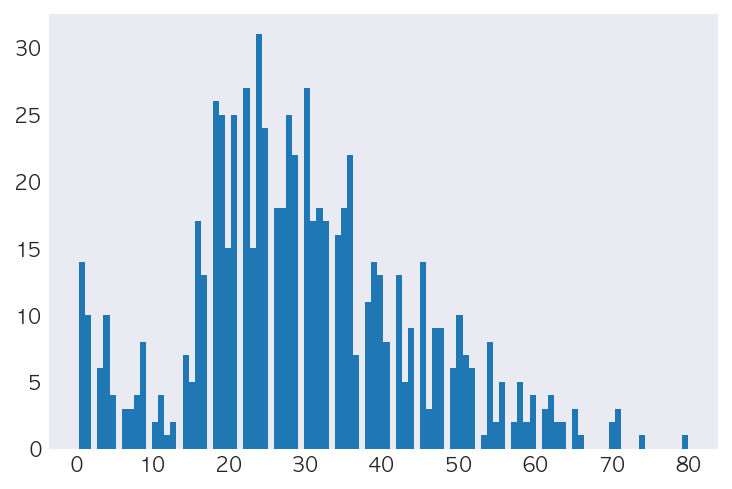

In [465]:
plt.hist(df.age,bins=100) # 나이는 20,30대가 제일 많다

<BarContainer object of 891 artists>

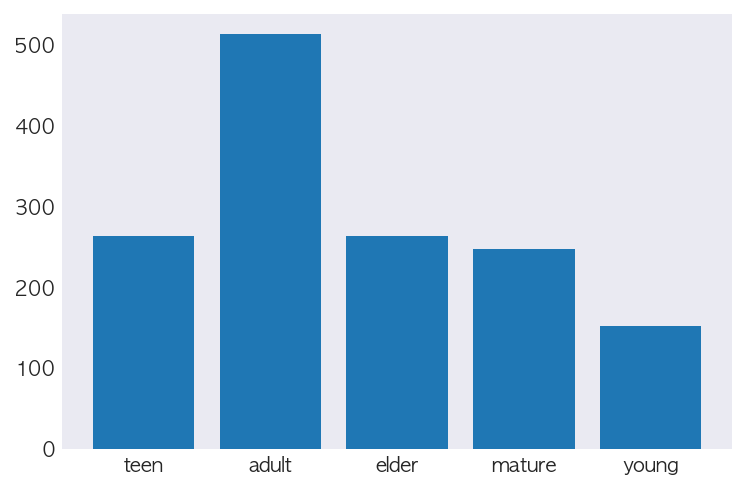

In [470]:
plt.bar(df.age_cat,df.fare) # 나이 카테고리별 지불 금액

[2 0 1 3]


<BarContainer object of 891 artists>

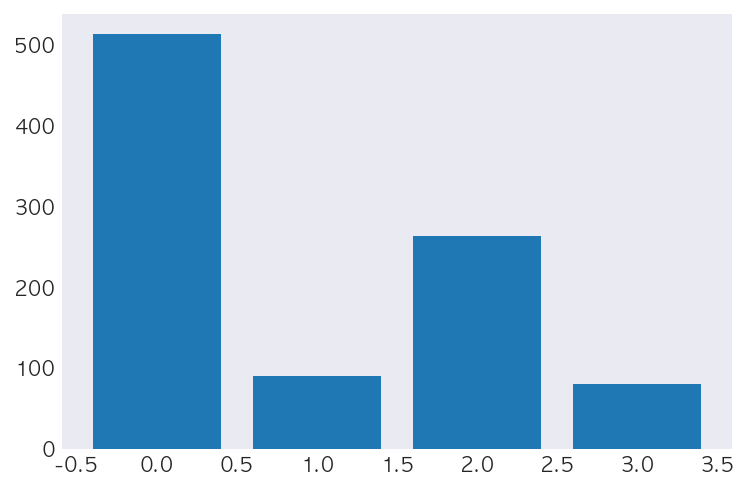

In [478]:
from sklearn.preprocessing import LabelEncoder
li = LabelEncoder()
da = ['embarked']
for i in da:
    df[i] = li.fit_transform(df[i])
print(df.embarked.unique())
plt.bar(df.embarked,df.fare) # 탑승 지역별 지불 금액 지역별 평균 지불 금액에 차이가 있다.

line : 변화를 보기 위한 그래프로 많이 씀. 시간에 따른 변화 (multi_line : 시간에 따라서 두 값을 비교할 수 있음.)

bar : x값 각각의 y값의 변화. stacked으로 누적으로도 볼 수 있음 (한달간의 공부시간양. 전체 총량과 비교 가능.) 

      (stacked을 쓰면 여러가지 속성을 한번에 볼 수 있음. (ex: 20210727의 공부시간, 자습시간, 쉬는시간 속성을 비교 확인 가능)
      
scatter : 두 변수의 관계를 볼 때 많이 씀

histogram : 도수분포표, 값이나 범위의 '빈도'가 어떤지 확인 할 수 있음. 평균을 기준으로 대칭되는 성질(도수분포표)

boxplot : 이상치 확인할때 많이 씀. 구조가 데이터의 전체를 구조적으로 보여줄 수 있으며, 이상치에 속하는 것들을 눈으로 표시하게 쉽도록 함.

pie : 분포를 확인할 때 씀